# Explore Clusters Dataset

In [1]:
import numpy as np
import pandas as pd
import pyarrow.parquet as pq

In [2]:
#data = pd.read_pickle(f"data/600AMeV_15dp.trifeature.pkl")
data = pq.read_table("data/600AMeV_30dp.clusters.parquet").to_pandas()
print(data)

            i_event  prim          T           E  Size        EToF  \
0               0.0   0.0  66.661659    4.069479   1.0  600.351440   
1               0.0   0.0  69.544830    2.467027   1.0  504.025269   
2               0.0   0.0  81.988297    3.172740   1.0  291.476471   
3               0.0   0.0  78.243698    2.301043   1.0  336.337494   
4               0.0   0.0  66.727623    1.632424   1.0  613.938904   
...             ...   ...        ...         ...   ...         ...   
97266003  4999999.0   0.0  72.575447   27.632694   1.0  546.807861   
97266004  4999999.0   1.0  58.958469  196.748352   8.0  613.727783   
97266005  4999999.0   1.0  60.839294    5.206954   1.0  614.102295   
97266006  4999999.0   1.0  61.100288  220.708832   6.0  621.196533   
97266007  4999999.0   1.0  71.825256  119.430115   3.0  556.065491   

          EnergyMoment    TSpawn    MaxEHit          X           Y       Z  
0         0.000000e+00  0.000000   4.069479   1.769501  -52.500000  1582.5  
1    

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

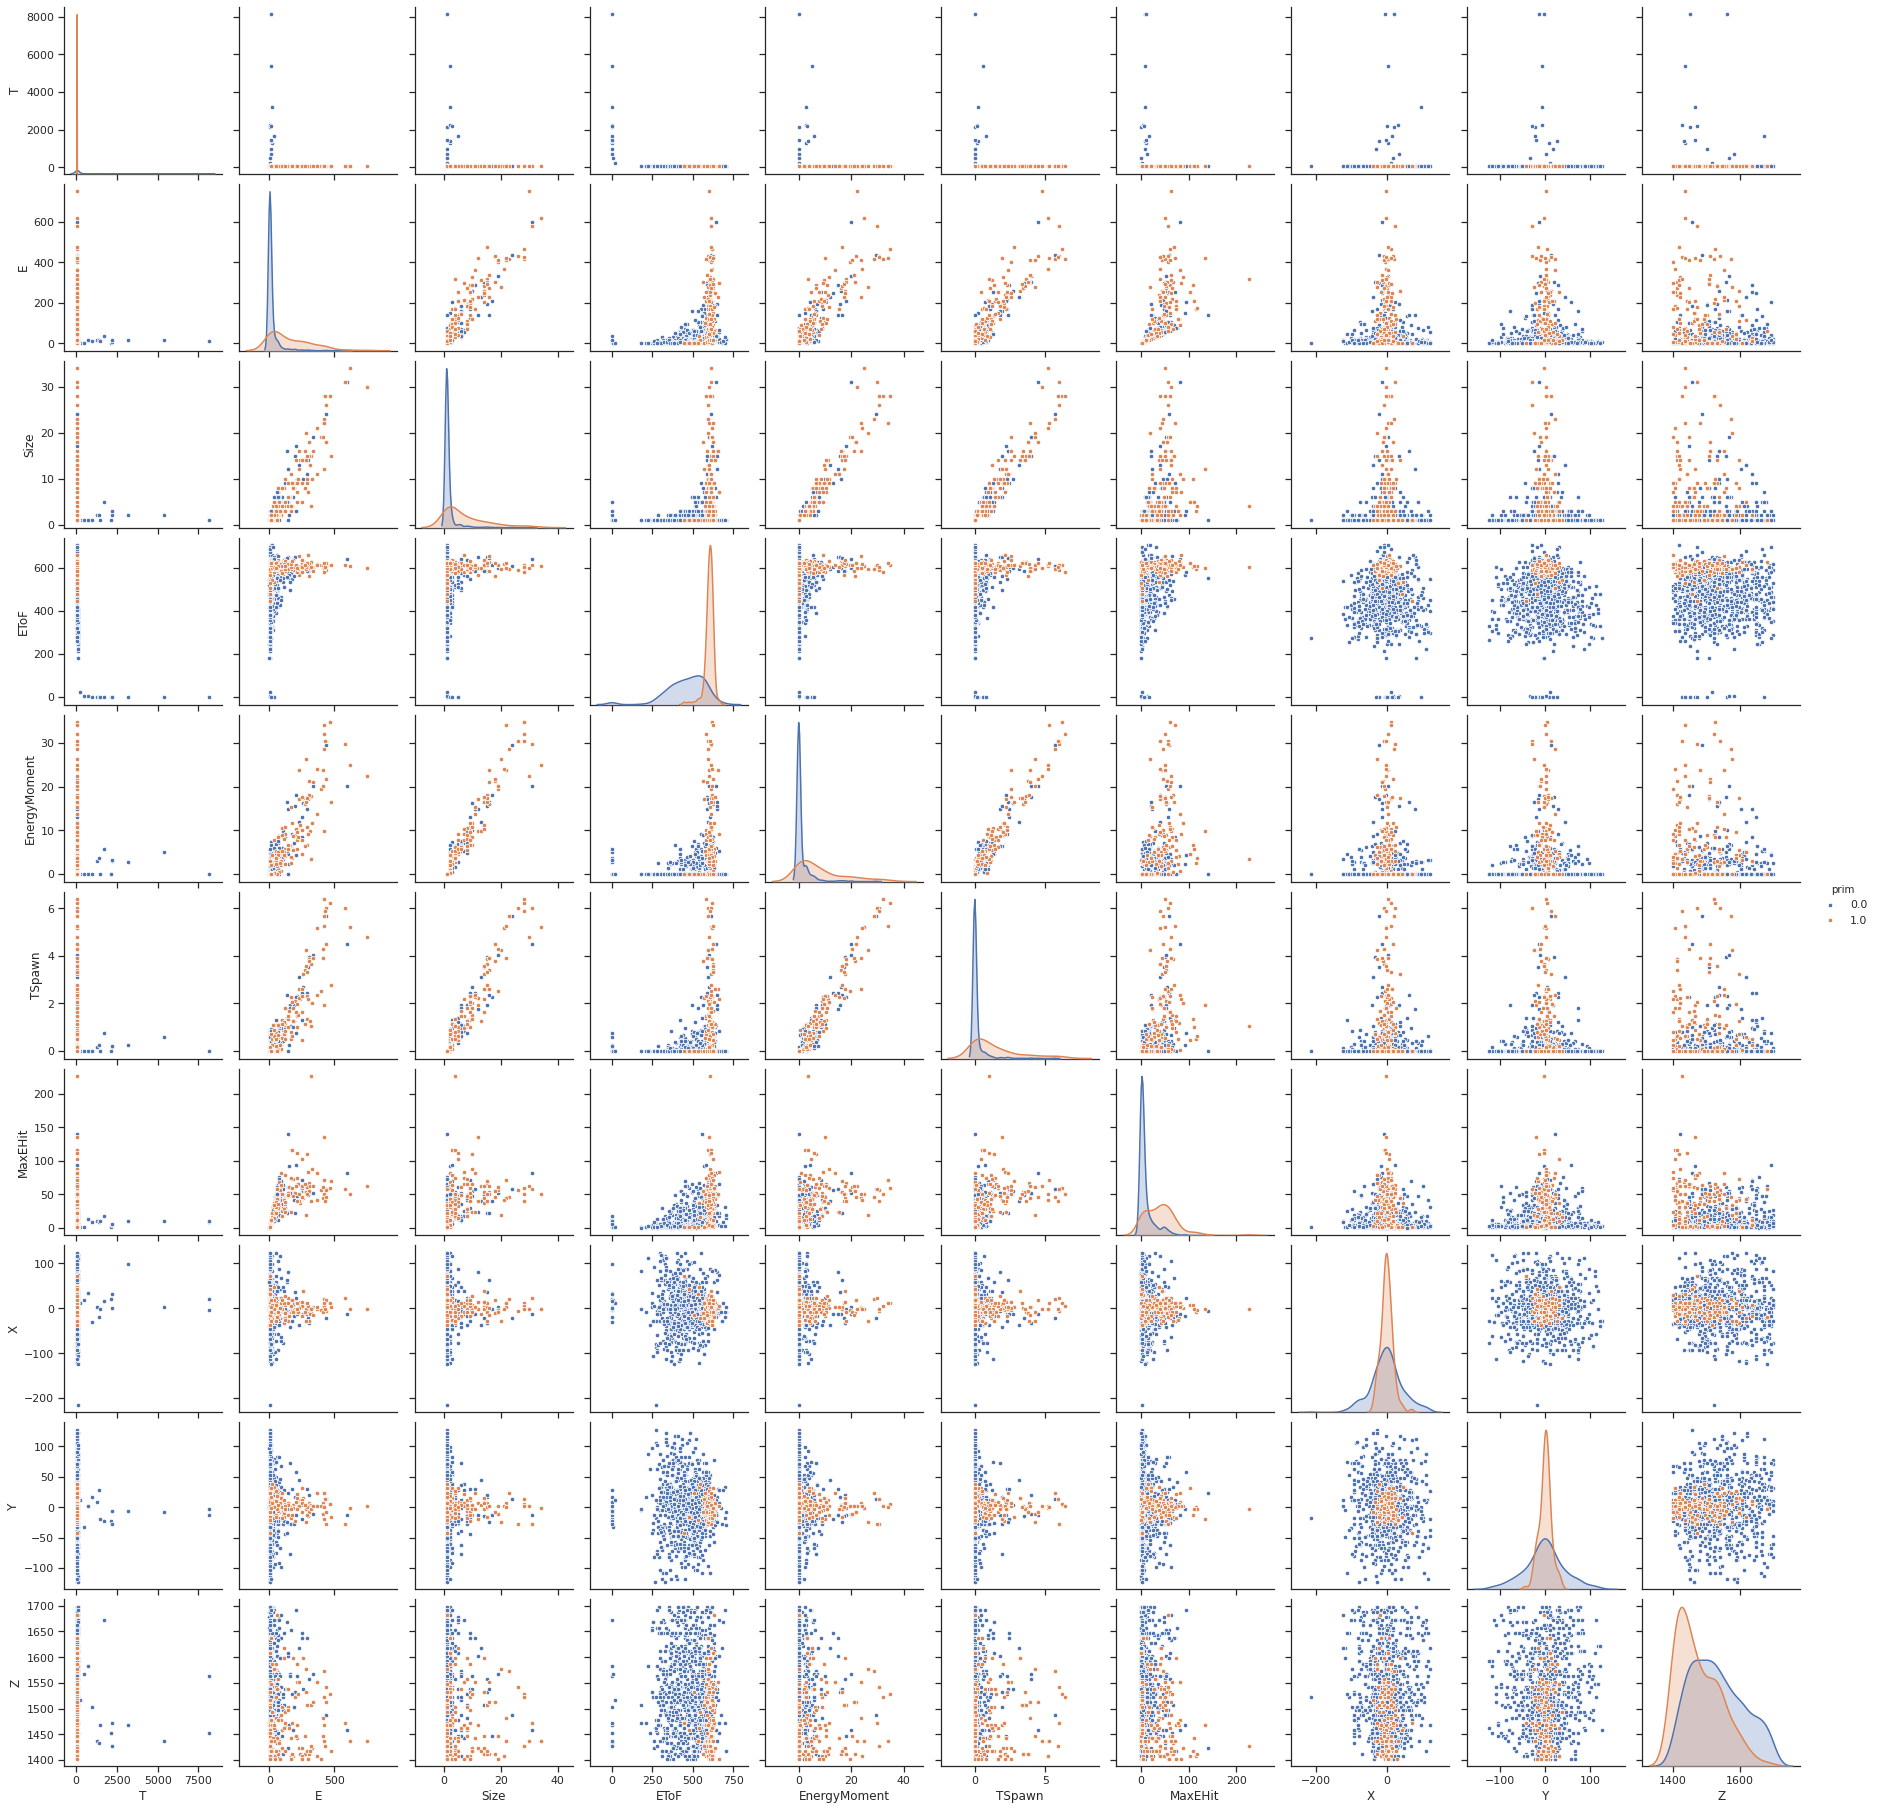

In [4]:
sample = data.sample(frac=0.00001)
sns.set(style="ticks", color_codes=True)
sns.pairplot(sample, vars=["T", "E", "Size", "EToF", "EnergyMoment", "TSpawn", "MaxEHit", "X", "Y", "Z"], hue="prim", plot_kws={"s": 20});